In [1]:
import json
import pickle
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
json_path = './vueDos/Sujet'
xsens_path = '../Xsens_dosHz.p'
n = ['11','12','13','15','21']
def load_json(i):
    file_path =json_path+i+'_1d_success.json' 
    with open(file_path , 'rb') as fl:
        data = json.load(fl)
    return data
def pickle_data(i,angleName):
    with open(xsens_path, 'rb') as f:
        xsens_data = pickle.load(f)
    xs = xsens_data['Sujet'+i+'_T1']
    l = xs[angleName].tolist()
    return l
def get_angle(angleName,dict_):
    data = dict_['frames']
    angles = []
    for key,values in data.items():
        angles.append(values['angles'][angleName])
    return angles

#données d'entrainement 
def recup_data(n,angleName):
    datas = []
    data_xsens = []
    for i in n:
        d = load_json(i)
        datas.append(get_angle(angleName,d))
        data_xsens.append(pickle_data(i,angleName))
    datas = sum(datas , [])
    #datas = [elmt*-1 for elmt in datas]
    data_xsens = sum(data_xsens,[])
    #dans le cas ou xsens et LEA n'ont pas le même nombre de frame
    if(len(datas) > len(data_xsens)):
        diff = len(datas)-len(data_xsens)
        j = 1
        while j<= diff:
            del datas[len(datas)-1-j]
            j = j+1
    input_ = np.array(datas)
    output_ = np.array(data_xsens)
    return input_,output_
input_,output_ = recup_data(n,'Rt')
#lissage par Savitzky-Golay ou savgol
np.set_printoptions(precision=2)
input_ = savgol_filter(input_, 7, 2, mode='nearest')
input_ = input_.reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(input_)
input_ = scaler.transform(input_)
#input_ ,output_= make_regression(n_features = 1, n_samples=len(input_) ,random_state=1) #return input: ndarray of shape(n_samples,n_fetures)
                                                                                        #        output:ndarray of shape(n_samples)
input_train, input_test, output_train, output_test = train_test_split(input_, output_,test_size=0.2,random_state=1)
regr = MLPRegressor(hidden_layer_sizes=(5,18,20,10,20,18,5,3),solver='lbfgs', max_iter=len(input_train))
score_train= 0
while(score_train<0.3):
    regr = regr.fit(input_train, output_train)
    #output_pred = regr.predict(input_test)
    score_train = regr.score(input_test, output_test)
    print(score_train)

#save model 
filename = 'model_dos_stand_Rt.pkl'
pickle.dump(regr, open(filename, 'wb'))

0.2324172987210784
0.2396542578266474
0.2385601662975989
0.23955284250002307
-0.001505077082942563
0.2353466500526803
0.2305524764913881
0.23212388755138103
-0.001505077082942563
0.22614700159422652
0.22428008413043476
0.2331970921158084
0.2383492813983088
0.23216030942306387
0.2336390057644988
0.23357974484279154
0.2392714283011329
-0.0015050446089082126
0.24757469619690786
0.23358782003110368
0.23618306105382347
-0.0015053392157000633
0.23797727343316788
-0.0015050745629059392
0.23294612048313668
0.23347372545721357
-0.0015050771797713303
0.23193546425910894
0.23697989932686547
-0.0015050771269713437
-0.0015050770939146751
0.24790759337644963
0.23978210819771717
0.22749569274317583
-0.0015050771870444013
0.2369993008552448
-0.001505077238739938
0.23213797303348682
0.24731292701476526
-0.0015050771686513365
0.23951766142209419
0.2521003964885177
-0.0015050774590887883
-0.001505077164541957
0.23488608471774464
0.24071501356961156
0.23497866592023975
0.24348726490070605
0.23727906450747

KeyboardInterrupt: 

0.7488376852234048


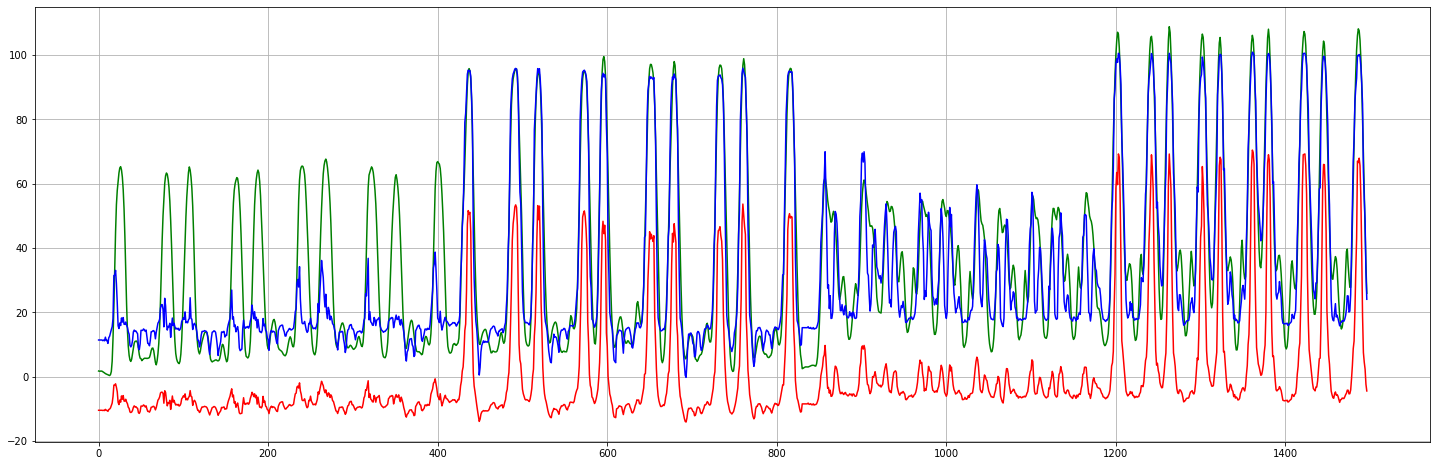

In [5]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
json_path = './vueDos/Sujet'
xsens_path = '../Xsens_dosHz.p'
def load_json(i):
    file_path =json_path+i+'_1d_success.json' 
    with open(file_path , 'rb') as fl:
        data = json.load(fl)
    return data
def pickle_data(i,angleName):
    with open(xsens_path, 'rb') as f:
        xsens_data = pickle.load(f)
    xs = xsens_data['Sujet'+i+'_T1']
    l = xs[angleName].tolist()
    return l
def get_angle(angleName,dict_):
    data = dict_['frames']
    angles = []
    for key,values in data.items():
        angles.append(values['angles'][angleName])
    return angles

#données d'entrainement 
def recup_data(n,angleName):
    datas = []
    data_xsens = []
    for i in n:
        d = load_json(i)
        datas.append(get_angle(angleName,d))
        data_xsens.append(pickle_data(i,angleName))
    datas = sum(datas , [])
    datas = [elmt*-1 for elmt in datas]
    data_xsens = sum(data_xsens,[])
    #dans le cas ou xsens et LEA n'ont pas le même nombre de frame
    if(len(datas) > len(data_xsens)):
        diff = len(datas)-len(data_xsens)
        j = 1
        while j<= diff:
            del datas[len(data_xsens)-1+j]
            j = j+1
    input_ = np.array(datas)
    output_ = np.array(data_xsens)
    return input_,output_

n_test = ['14','22']
x,y = recup_data(n_test,'Ft')

x = x.reshape(-1,1)
X = scaler.transform(x)
#charger le model
filename = 'model_dos_stand.pkl'
model = pickle.load(open(filename, 'rb'))
y_pred = model.predict(X)
score_test = model.score(X, y)
print(score_test)
x=np.ravel(x)
fig , ax = plt.subplots(nrows=1, figsize=(25, 8))
ax.plot(range(len(y)),y,color = 'green')
ax.plot(range(len(y_pred)),y_pred,color = 'blue')
ax.plot(range(len(x)),x,color = 'red')
ax.grid()    
plt.show()
